# Final Project Submission


* Student name: **Andrew Hotchkiss**
* Student pace: **Part time**
* Scheduled project review date/time: **8/17/2020, 2pm EDT**
* Instructor name: **James Irving**
* Blog post URL: https://stones-1130.github.io/interpreting_modeling_results_after_log_transformation


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> **Assignment-** Clean, explore, and model the Kings County, WA Home Sale dataset (2014-2015) with a multivariate linear regression to predict the sale price of houses as accurately as possible.


> **Approach:**
> My goal for this project was to provide recommendations to a seller on how to increase the sale price of their home. I chose to look at this problem from the perspective of someone selling their home in the near-future and a future seller who's looking to put their home on the market in 5-years. 

> Initially, I determined to what extent certain attributes of the homes affected the overall housing price. 

>  Lastly, I trained a multivariate linear regression model to be able to accurately predict home prices based on certain features of the home.



# OBTAIN

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv("kc_house_data.csv")
pd.options.display.max_columns = None
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Below feature column descriptions from: https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

![](KC_data_dict.png)

In [69]:
#EXAMINE THE DATA TYPES, ALSO LOOK FOR MISSING DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [70]:
#DROP ID and LAT/LONG COLUMNS
df.drop(['id','lat','long'],axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


> From first glance, it looks like we need to recast the following columns into the correct data type:

> - "date" object to int64 format
> - "sqft_basement" to int64
> - "yr_renovated" to int64

In [71]:
#LOOK CLOSER AT 'sqft_basement' COLUMN
df['sqft_basement'].value_counts(dropna=False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2250.0        1
2130.0        1
207.0         1
2050.0        1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [72]:
#CHANGE 'sqft_basement' COLUMN TO NUMERIC AND CHANGE ERRORS TO NA VALUES
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['sqft_basement'].value_counts(dropna=False)

0.0       12826
NaN         454
600.0       217
500.0       209
700.0       208
          ...  
588.0         1
1920.0        1
2390.0        1
1245.0        1
1135.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [73]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [74]:
#BECAUSE WE HAVE LOTS OF NA VALUES IN BOTH COLUMNS, WE'LL LEAVE THEM AS FLOATS FOR NOW
#AND CONVERT data COLUMN TO STRING
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['yr_renovated'] = df['yr_renovated'].astype('float')
df['date'] = df['date'].astype('str')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [76]:
#LOOK AT COLUMNS WITH NUMERICAL DTYPES
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [77]:
#DO A QUICK PASS OF THE TOP 5 VALUE COUNTS FOR EACH INT64 COLUMN TO QUICKLY CHECK DATA QUALITY
pd.set_option('display.max_rows', 20)
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, d

# EXPLORE

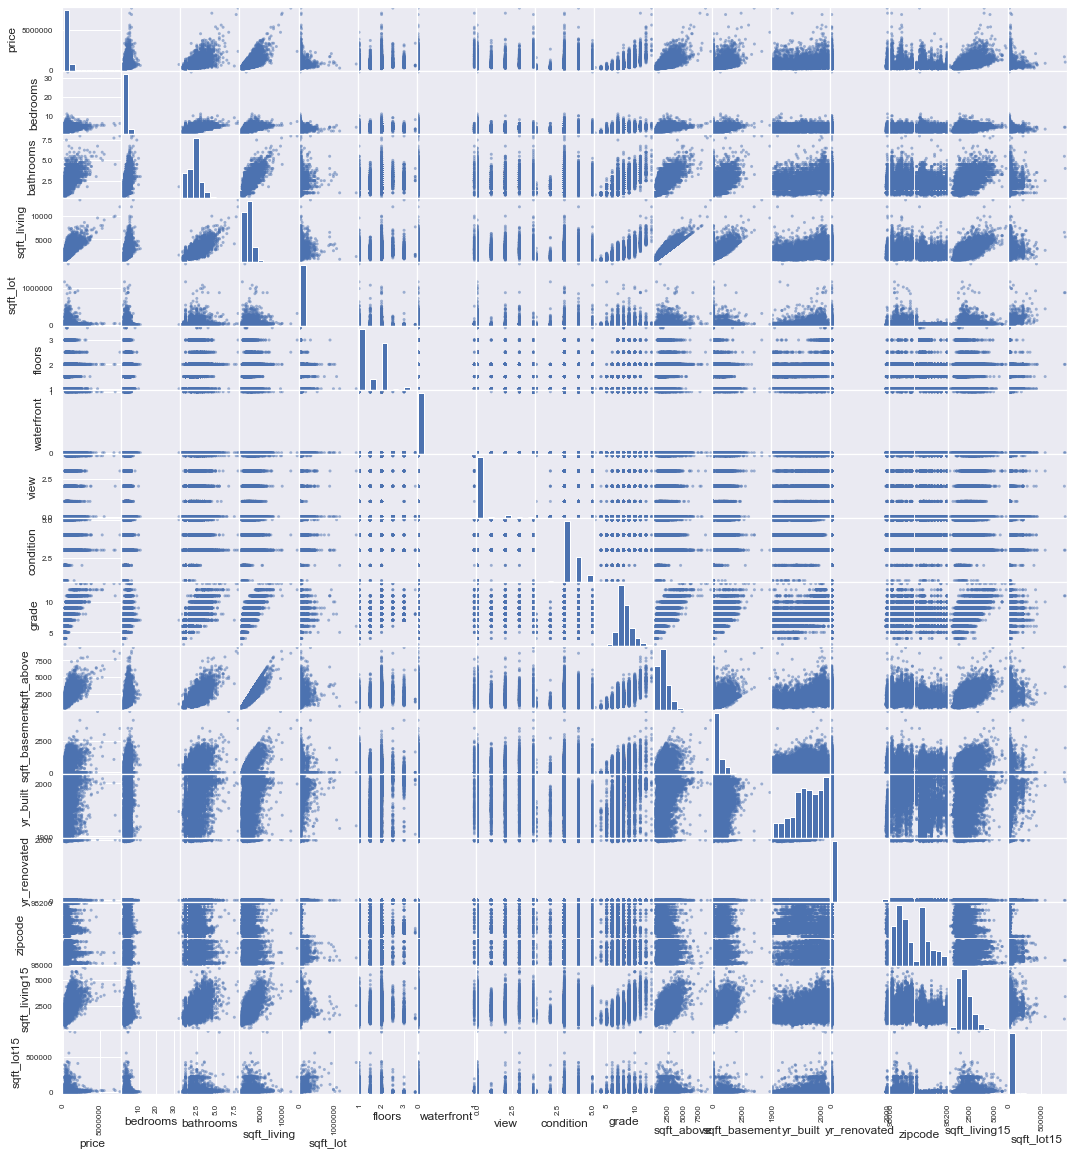

In [78]:
# INITIAL SCATTER PLOT TO LOOK AT RELATIONSHIPS BETWEEN FEATURES. 
pd.plotting.scatter_matrix(df, figsize=(18,20));

> **Scatter matrix analysis:**
> - Categorical variables:
    - Floors, waterfront, view, condition, grade, zipcode
> - Numerical variables: 
    - price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15

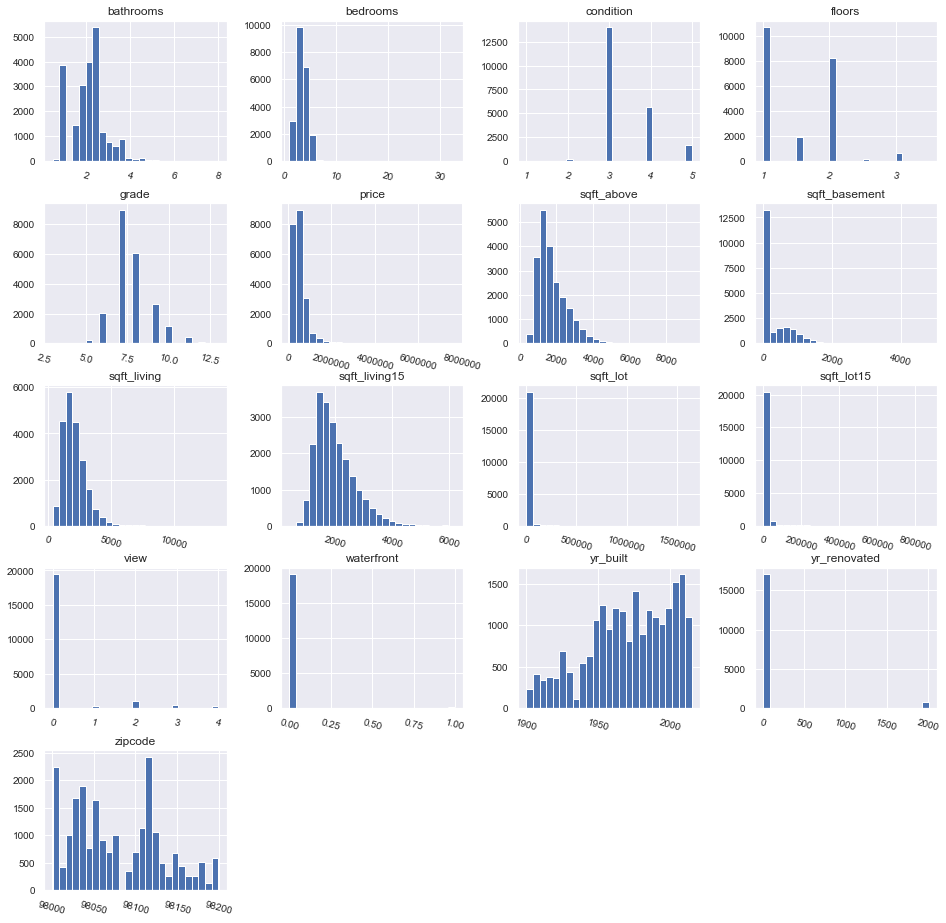

In [79]:
# HISTOGRAM ANALYSIS TO LOOK AT THE VARIABLE DISTRIBUTIONS

df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15);

> **Histogram analysis:** 
> - **There's clearly some data preprocessing that we'll need to do in order to effectively use this data in our model. This will include normalization and scaling techniques.**
> - **As you can see, almost none of the features have a normal distribution, there's a mixture of categorical and discrete/continuous variables, and large range of magnitudes.**

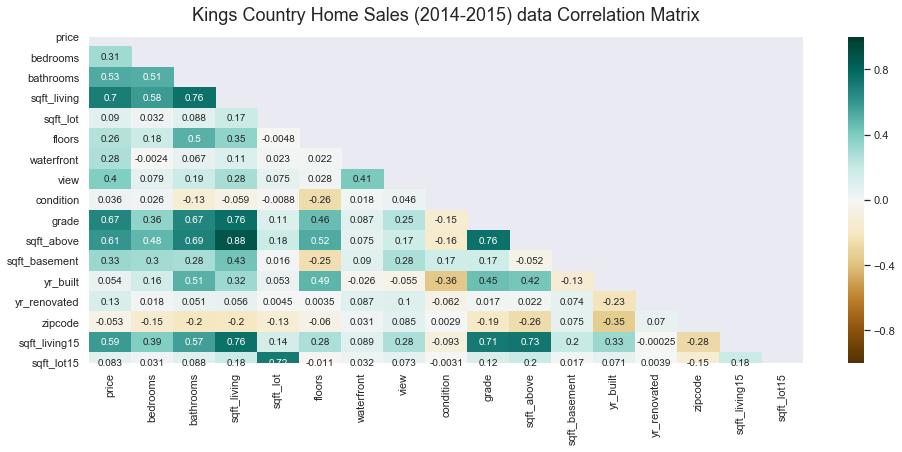

In [80]:
#CHECK FOR MULTI-COLLINEARITY
#CODE FROM: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Kings Country Home Sales (2014-2015) data Correlation Matrix', fontdict={'fontsize':18}, pad=16);

> **Correlation Matrix Takeaways:** 

> 1. **Bathrooms, sqft_living, grade, sqft_above, and sqft_living15** all appear to be positively correlated with price, our independent variable. This makes sense- a larger house typically has more bathrooms and is more expensive.

> 2. A few variables could present problems with multi-collinearity (> .75). 

> - sqft_living & bathrooms
> - sqft_living & grade
> - sqft_living & sqft_above
> - sqft_living & sqft_living15

> 3. When we run our base model, we need to look at dropping **at least one** of these features.


In [81]:
#ANOTHER WAY TO VISUALLY REPRESENT MULTI-COLLINEARITY
test_corr = abs(df.corr()) > 0.75

test_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [82]:
#LOOK AT SUM OF BOOLEANS IN EACH ROW TO DETERMINE WHICH VARIABLES HAVE THE MOST CORRELATIONS > .75
sum_row = test_corr.sum(axis=1)
print(sum_row)

price            1
bedrooms         1
bathrooms        2
sqft_living      5
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            3
sqft_above       3
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
sqft_living15    2
sqft_lot15       1
dtype: int64


In [83]:
#DROP date COLUMN
df.drop(['date'],axis=1,inplace=True)

> **Let's explore what features have an effect on price. First, let's look at the categorical variables from the scatter plot** 

> - **View**
> - **Condition**
> - **Grade**
> - **Waterfront**
> - **Floors**
> - **Bedrooms**
> - **Bathrooms**

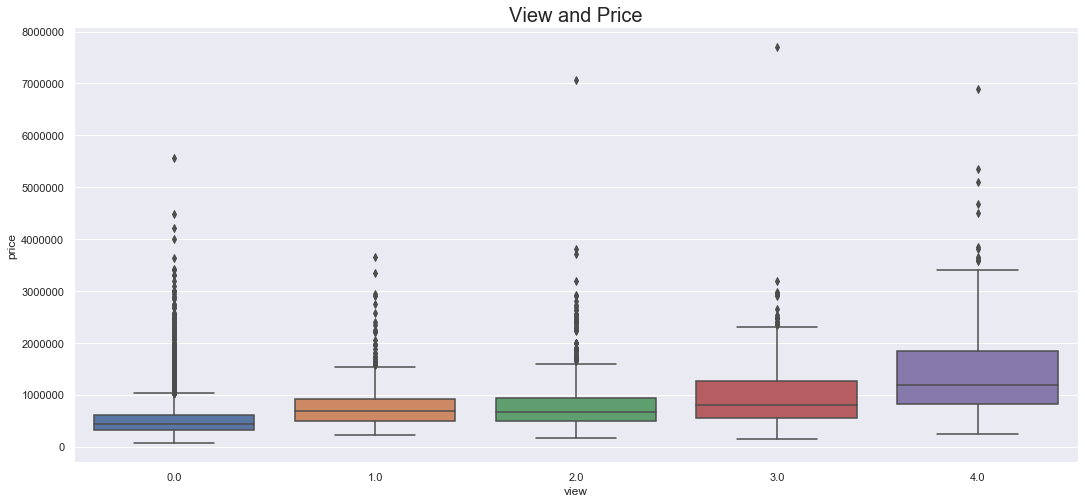

In [84]:
plt.figure(figsize=(18,8))
plt.title('View and Price', fontsize=20)
sns.boxplot(x='view', y='price', data=df);

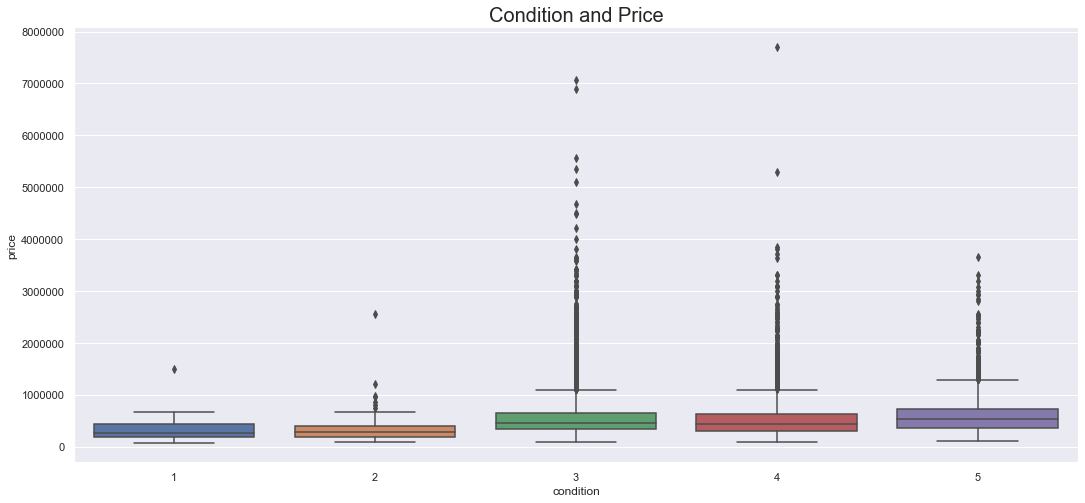

In [85]:
plt.figure(figsize=(18,8))
plt.title('Condition and Price', fontsize=20)
sns.boxplot(x='condition', y='price', data=df);

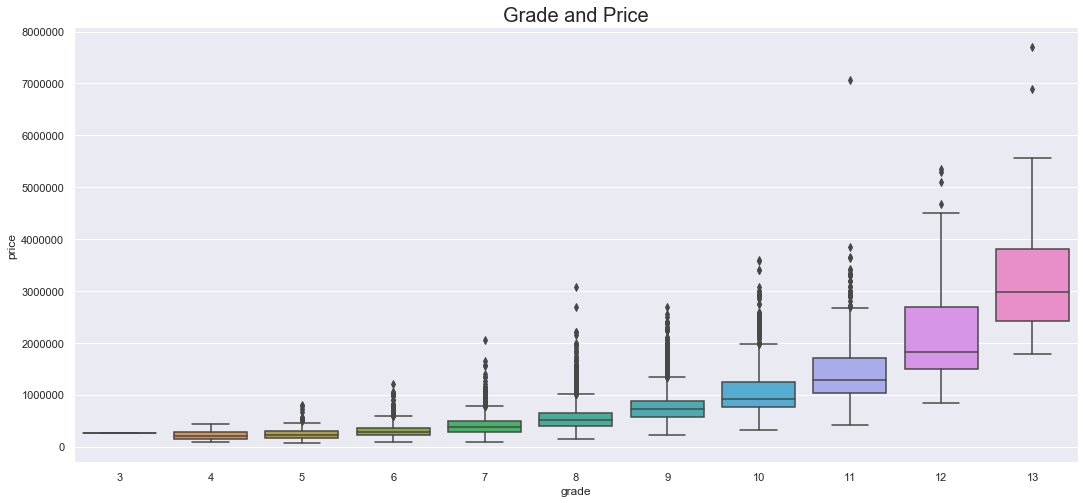

In [86]:
plt.figure(figsize=(18,8))
plt.title('Grade and Price', fontsize=20)
sns.boxplot(x='grade', y='price', data=df);

> **It looks like grade might be a good predictor of house price**

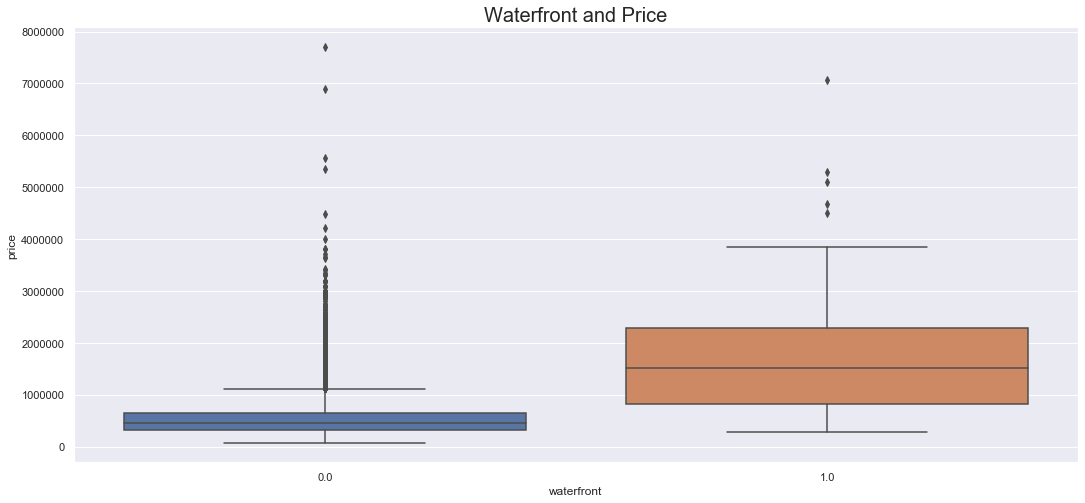

In [87]:
plt.figure(figsize=(18,8))
plt.title('Waterfront and Price', fontsize=20)
sns.boxplot(x='waterfront', y='price', data=df);

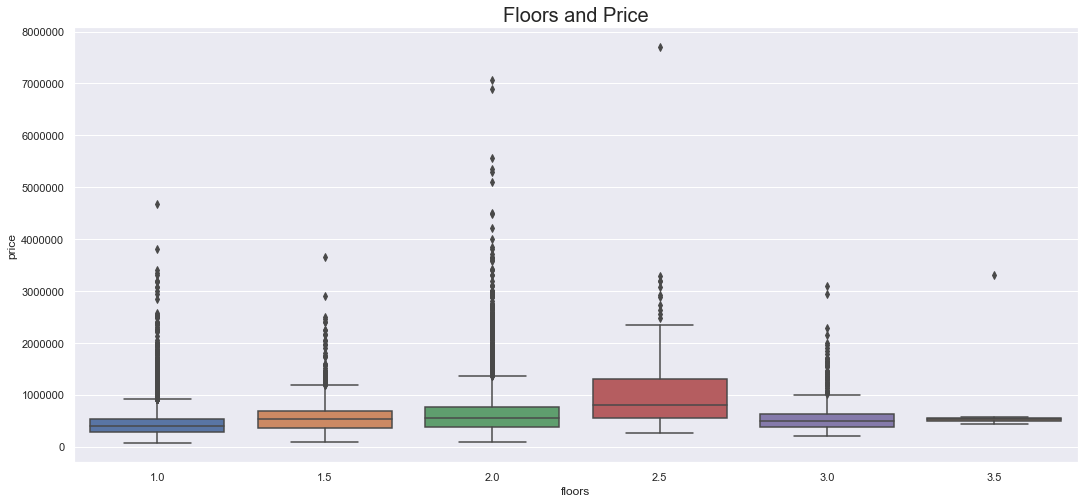

In [88]:
#FLOORS & PRICE
plt.figure(figsize=(18,8))
plt.title('Floors and Price', fontsize=20)
sns.boxplot(x='floors', y='price', data=df);

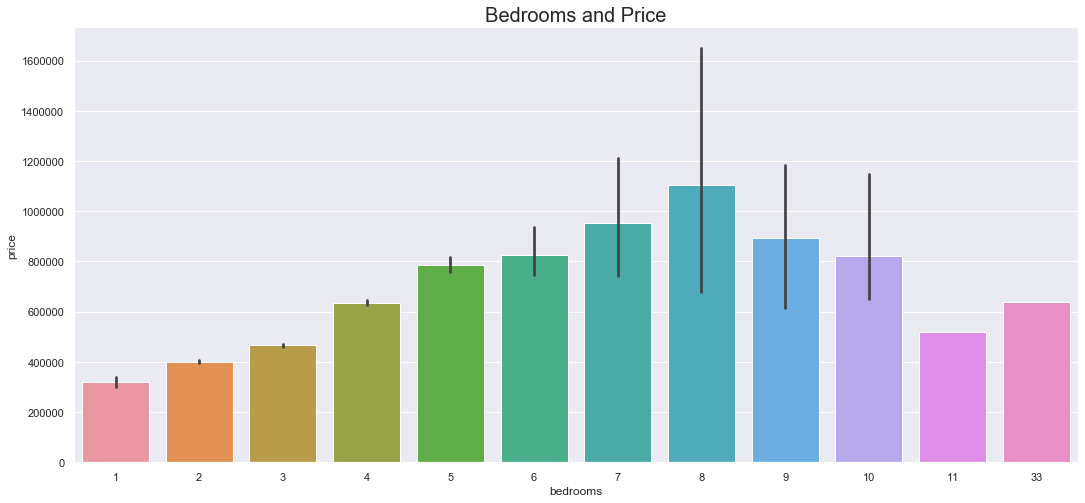

In [89]:
#BEDROOMS & PRICE
sns.set()
plt.figure(figsize=(18,8))
plt.title('Bedrooms and Price', fontsize=20)
sns.barplot(x='bedrooms', y='price', data=df);

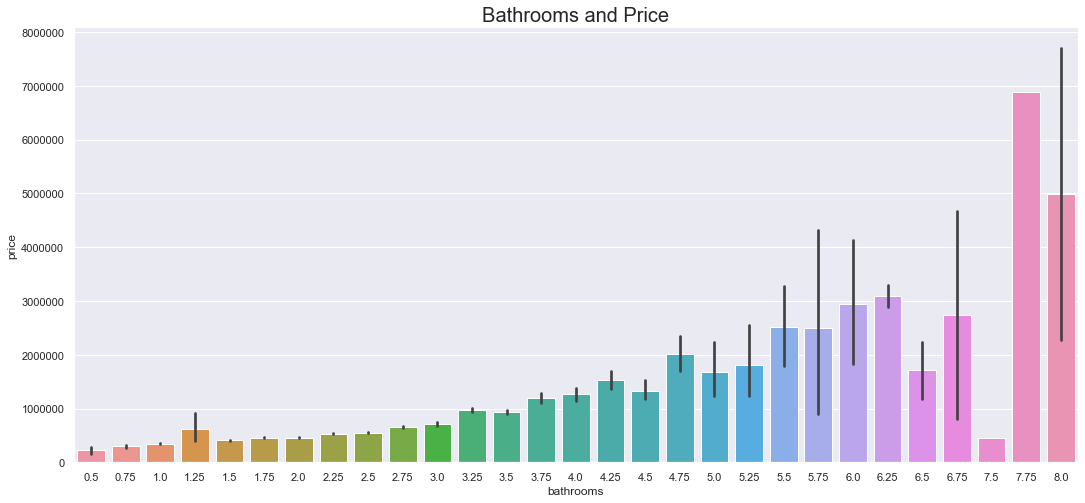

In [90]:
#BATHROOMS & PRICE
plt.figure(figsize=(18,8))
plt.title('Bathrooms and Price', fontsize=20)
sns.barplot(x='bathrooms', y='price', data=df);

> **Now let's explore some our continuous features:**

> - **sqft_living**
> - **sqft_basement**
> - **sqft_lot**


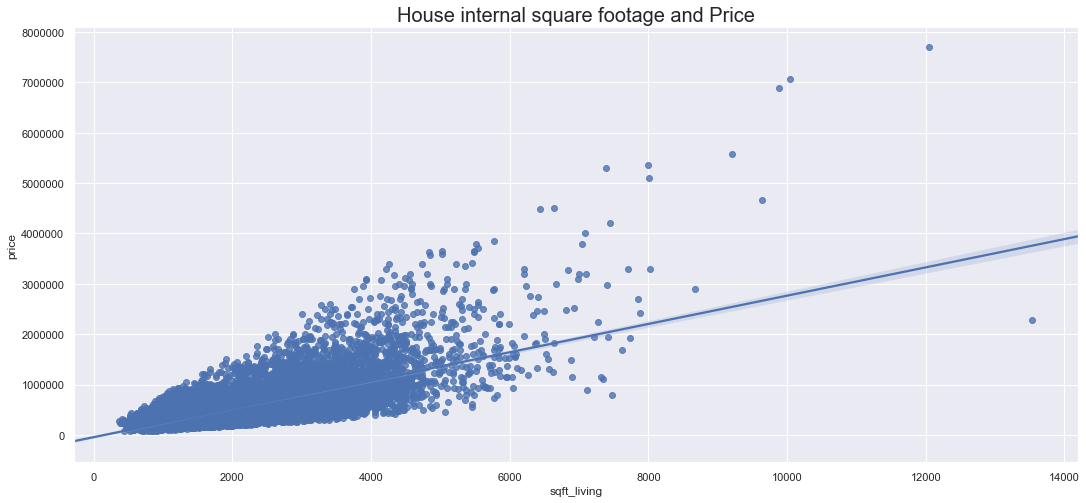

In [91]:
#SQFT_LIVING & PRICE
plt.figure(figsize=(18,8))
plt.title('House internal square footage and Price', fontsize=20)
sns.regplot(x='sqft_living', y='price', data=df, ci=95);


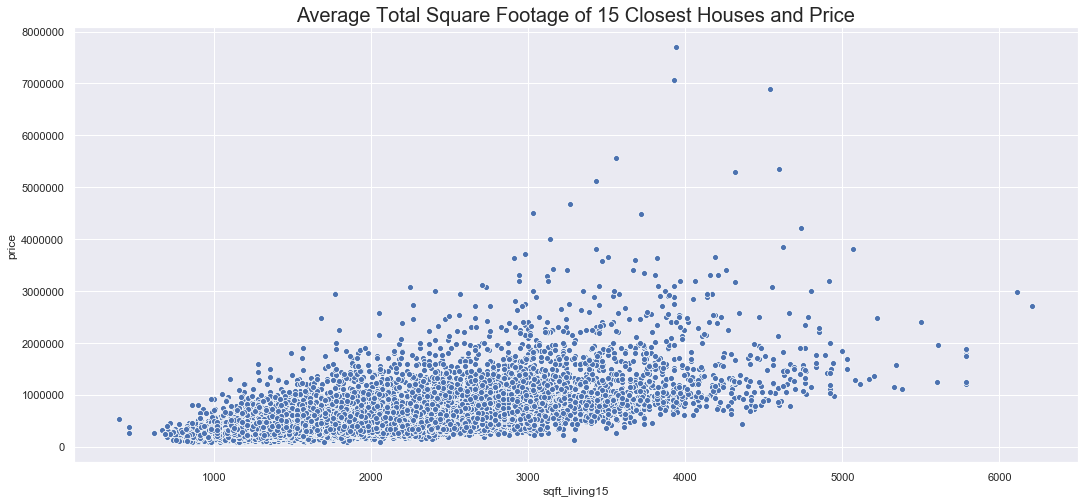

In [92]:
plt.figure(figsize=(18,8))
plt.title('Average Total Square Footage of 15 Closest Houses and Price', fontsize=20)
sns.scatterplot(x='sqft_living15', y='price', data=df);

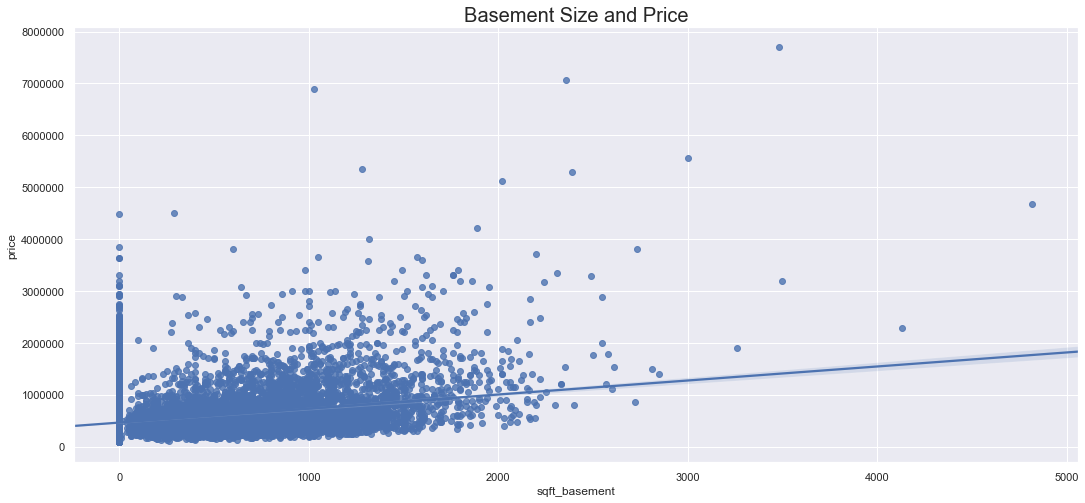

In [93]:
plt.figure(figsize=(18,8))
plt.title('Basement Size and Price', fontsize=20)
sns.regplot(x='sqft_basement', y='price', data=df, ci=95);

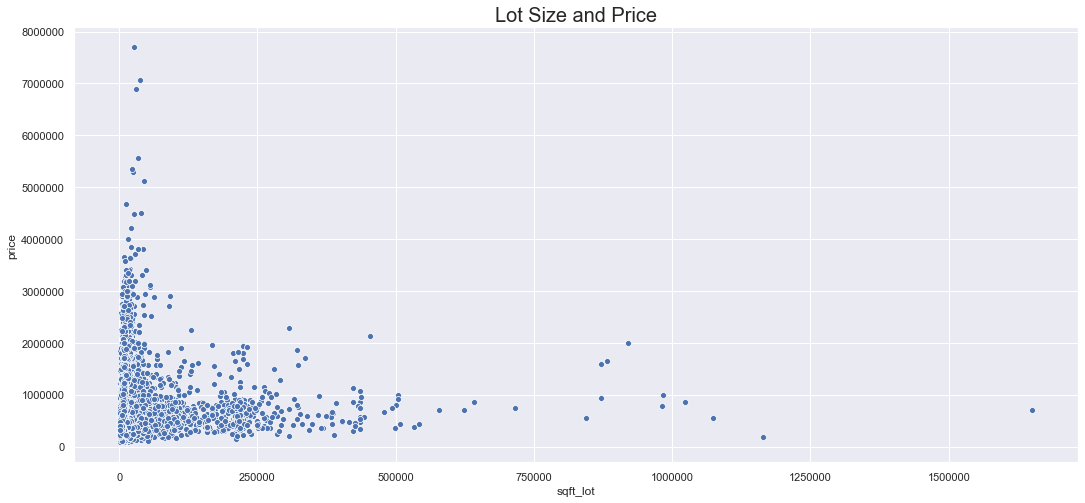

In [94]:
#SQFT_LOT & PRICE
plt.figure(figsize=(18,8))
plt.title('Lot Size and Price', fontsize=20)
sns.scatterplot(x='sqft_lot', y='price', data=df);

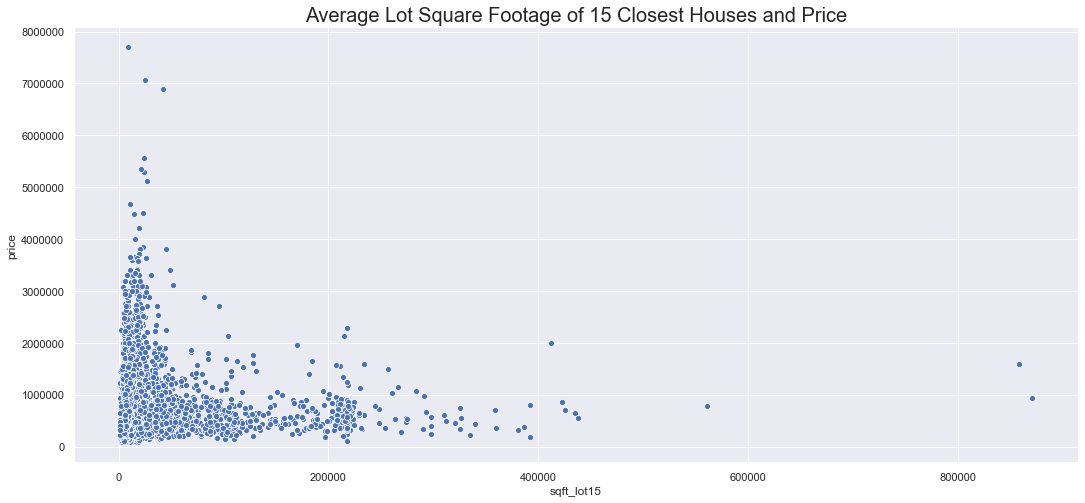

In [95]:
plt.figure(figsize=(18,8))
plt.title('Average Lot Square Footage of 15 Closest Houses and Price', fontsize=20)
sns.scatterplot(x='sqft_lot15', y='price', data=df);

> **EDA findings:**

> - **Grade, waterfront, bathrooms, bedrooms, and total home square-footage** appear to have the largest positive effect on home sale price. 


> **Explanation:** This makes sense when you think about how the data includes homes sold in suburban, rural areas outside of Seattle as well as homes/apartments in the downtown areas. 

> In reality, we'd expect that there are luxury apartments in downtown Seattle with only 1-2 bedrooms that would have a significantly higher sale price than a larger house with more bedrooms located in a more rural area. 

# SCRUB

In [96]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [97]:
#LET'S SEE WHAT PERCENTAGE OF THE FEATURE COLUMNS ARE NANs

waterfront = (2376/21957)*100
view = (63/21957)*100
sqft_basement = (454/21957)*100
yr_renovated = (3842/21957)*100

#df.dropna()

print(f"Waterfront: {waterfront}% of column")
print(f"View: {view}% of column")
print(f"Sqft_Basement: {sqft_basement}% of column")
print(f"Year Renovated: {yr_renovated}% of column")

Waterfront: 10.821150430386666% of column
View: 0.2869244432299494% of column
Sqft_Basement: 2.0676777337523338% of column
Year Renovated: 17.49783668078517% of column


In [98]:
#LET'S DROP THE ROWS WITH NANs FROM view AND sqft_basement BECAUSE THEY'RE SUCH A SMALL PERCENTAGE OF VALUES

df.dropna(subset=['sqft_basement'], inplace=True)

In [99]:
df.dropna(subset=['view'], inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [100]:
#THE VAST MAJORITY OF waterfront AND yr_renovated DATA IS "0", SO LET'S REPLACE ALL NANs IN THE waterfront COLUMN WITH "0"
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

# MODEL

## BASELINE MODEL

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols


In [102]:
#MAKE A COPY OF THE ORIGINAL DATA FRAME
df_base = df.copy()
df_base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


> **Remove features with multicollinearity problems previously identifed:**
> - sqft_above
> - sqft_basement
> - sqft_living15
> - sqft_lot

In [103]:
#BUILD THE BASE MODEL WITH STATSMODELS

cat_var = ['bedrooms','bathrooms','floors', 'grade', 'waterfront', 'condition', 
           'zipcode']

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'grade', 'waterfront', 'condition', 
           'zipcode']

outcome = 'price'
predictors = '+'.join(features)
formula = outcome + '~' + predictors
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+grade+waterfront+condition+zipcode'

> **Let's one-hot encode our categorical variables (named "cat_var" above).**

In [104]:
for col in cat_var: 
    formula = formula.replace(col, f"C({col})")

formula

'price~C(bedrooms)+C(bathrooms)+sqft_living+sqft_lot+C(floors)+C(grade)+C(waterfront)+C(condition)+C(zipcode)'

In [105]:
model = ols(formula=formula, data=df_base).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     778.9
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:47:41   Log-Likelihood:            -2.8143e+05
No. Observations:               21082   AIC:                         5.631e+05
Df Residuals:                   20951   BIC:                         5.642e+05
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -1.24e+04    1.8e+05     -0.069      0.945   -3.65e+05     3.4e+05
C(bedrooms)[T.2]     -1407.6990   1.19e+04     -0.118      0.906   -2.47e+04    2.19e+04
C(bedrooms)[T.3]      4547.4713   1.19e+04      0.381      0.703   -1.88e+04    2.79e+04
C(bedrooms)[T.4]     -1.454e+04   1.22e+04     -1.193      0.233   -3.84e+04    9358.584
C(bedrooms)[T.5]     -3.272e+04   1.28e+04     -2.547      0.011   -5.79e+04   -7538.002
C(bedrooms)[T.6]     -6.735e+04   1.57e+04     -4.295      0.000   -9.81e+04   -3.66e+04
C(bedrooms)[T.7]     -1.969e+05    2.9e+04     -6.787      0.000   -2.54e+05    -1.4e+05
C(bedrooms)[T.8]     -7.447e+04   4.49e+04     -1.658      0.097   -1.62e+05    1.36e+04
C(bedrooms)[T.9]     -2.041e+05   7.02e+04     -2.909      0.004   -3.42e+05   -6.66e+04
C(bedrooms)[T.10]    -3.553e+05   9.02e+04     -3.939      0.000   -5.32e+05   -1.78e+05
C(bedrooms)[T.11]    -2.551e+04   1.53e+05     -0.167      0.868   -3.26e+05    2.75e+05
C(bedrooms)[T.33]     1.592e+04   1.53e+05      0.104      0.917   -2.84e+05    3.16e+05
C(bathrooms)[T.0.75]  2.997e+04   9.01e+04      0.332      0.740   -1.47e+05    2.07e+05
C(bathrooms)[T.1.0]    6.04e+04   8.82e+04      0.685      0.493   -1.12e+05    2.33e+05
C(bathrooms)[T.1.25] -3.105e+04   1.02e+05     -0.305      0.760   -2.31e+05    1.69e+05
C(bathrooms)[T.1.5]   4.594e+04   8.83e+04      0.520      0.603   -1.27e+05    2.19e+05
C(bathrooms)[T.1.75]  4.384e+04   8.83e+04      0.497      0.619   -1.29e+05    2.17e+05
C(bathrooms)[T.2.0]    4.54e+04   8.83e+04      0.514      0.607   -1.28e+05    2.18e+05
C(bathrooms)[T.2.25]  5.545e+04   8.83e+04      0.628      0.530   -1.18e+05    2.29e+05
C(bathrooms)[T.2.5]   4.779e+04   8.83e+04      0.541      0.589   -1.25e+05    2.21e+05
C(bathrooms)[T.2.75]  5.135e+04   8.84e+04      0.581      0.561   -1.22e+05    2.25e+05
C(bathrooms)[T.3.0]   6.544e+04   8.85e+04      0.740      0.460   -1.08e+05    2.39e+05
C(bathrooms)[T.3.25]  1.086e+05   8.86e+04      1.226      0.220    -6.5e+04    2.82e+05
C(bathrooms)[T.3.5]   6.249e+04   8.86e+04      0.706      0.480   -1.11e+05    2.36e+05
C(bathrooms)[T.3.75]  1.531e+05   8.93e+04      1.716      0.086   -2.18e+04    3.28e+05
C(bathrooms)[T.4.0]   1.457e+05   8.94e+04      1.629      0.103   -2.96e+04    3.21e+05
C(bathrooms)[T.4.25]  2.329e+05   9.02e+04      2.582      0.010    5.61e+04     4.1e+05
C(bathrooms)[T.4.5]   1.742e+05   8.99e+04      1.939      0.053   -1926.329     3.5e+05
C(bathrooms)[T.4.75]  4.112e+05   9.42e+04      4.364      0.000    2.26e+05    5.96e+05
C(bathrooms)[T.5.0]    2.58e+05   9.53e+04      2.707      0.007    7.12e+04    4.45e+05
C(bathrooms)[T.5.25]   2.65e+05   9.85e+04      2.691      0.007     7.2e+04    4.58e+05
C(bathrooms)[T.5.5]   3.607e+05   1.03e+05      3.502    

In [123]:
#NEED TO ONE-HOT ENCODE CATEGORICAL VARIABLES AND MERGE WITH NUMERICAL VARIABLES

bed_dummies = pd.get_dummies(df_base['bedrooms'], prefix='bed', drop_first=True)
bath_dummies = pd.get_dummies(df_base['bathrooms'], prefix='bath', drop_first=True)
floor_dummies = pd.get_dummies(df_base['floors'], prefix='fl', drop_first=True )
grade_dummies = pd.get_dummies(df_base['grade'], prefix='gd', drop_first=True )
wtf_dummies = pd.get_dummies(df_base['waterfront'], prefix='wtf', drop_first=True)
cond_dummies = pd.get_dummies(df_base['condition'], prefix='cd', drop_first=True)
zip_dummies = pd.get_dummies(df_base['zipcode'], prefix='zip', drop_first=True)

price = df_base['price']

data = pd.concat([price, df_base[features], bed_dummies, bath_dummies, floor_dummies, grade_dummies, wtf_dummies, 
                 cond_dummies, zip_dummies], axis=1)

y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16865 4217 16865 4217


In [165]:
# FIT SCIKIT LEARN MODEL
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# PREDICT
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


# LOOK AT RESIDUALS
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Diff between Test/Train RMSE:', abs(train_rmse-test_rmse))
print('R2 train:' , r2_train)
print('R2 test:' , r2_test)

Train Mean Squared Error: 23104529846.12526
Test Mean Squared Error: 24547843729.89171
Train Root Mean Squared Error: 152001.74290489324
Test Root Mean Squared Error: 156677.51507440917
Diff between Test/Train RMSE: 4675.772169515927
R2 train: 0.8282919653161583
R2 test: 0.8170501174037272


In [157]:
# ACTUAL VS. PREDICTED VALUES ANALYSIS

# Code inspired by:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


pred_df_base = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test, 'Diff': abs(y_test-y_hat_test)}).round(2)

df1 = pred_df_base.sort_values(by=['Diff'], ascending=False).head(20)

df1

,Actual,Predicted,Diff
12358,4210000.0,1863995.29,2346004.71
9478,2380000.0,961785.95,1418214.05
7304,2500000.0,1086981.97,1413018.03
20519,2950000.0,1629929.76,1320070.24
13954,3400000.0,2120529.87,1279470.13
13398,2420000.0,3658970.74,1238970.74
1431,2540000.0,1319050.21,1220949.79
19133,3640000.0,2450389.86,1189610.14
6396,2900000.0,1746732.98,1153267.02
4807,2480000.0,3584371.31,1104371.31


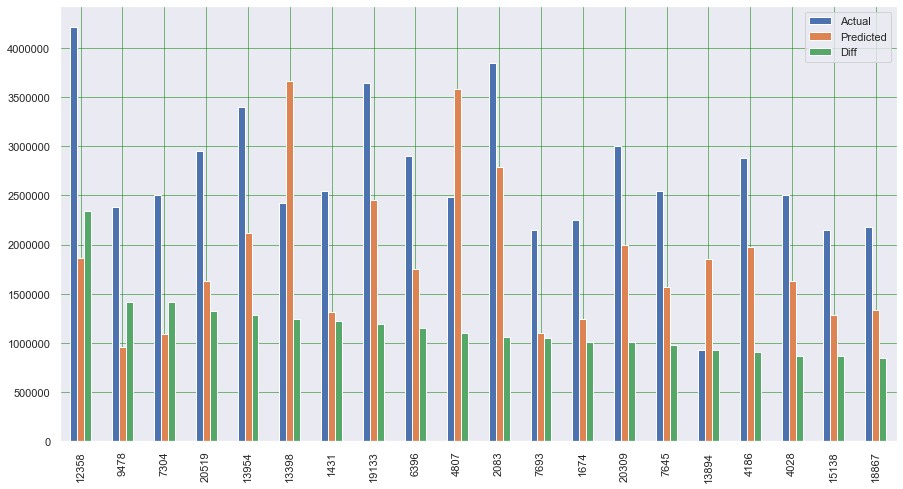

In [158]:
#VISUAL ANALYSIS OF OUR ACTUAL VS. PREDICTED AND DIFFERENCE FROM OUR BASE MODEL
#CODE FROM: 
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
#MULTI-COLLINEARITY ANALYSIS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# run the non-categorical values through VIF

vif = pd.DataFrame()
X = df_base[features]
X = sm.add_constant(X)
vif['VIF value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

vif.sort_values(by=['VIF value'], ascending=False).round(3)

,VIF value,Feature
0,3597321.679,const
3,4.022,sqft_living
2,2.890,bathrooms
6,2.791,grade
1,1.628,bedrooms
5,1.511,floors
8,1.090,condition
9,1.070,zipcode
4,1.058,sqft_lot
7,1.020,waterfront


> **Multicollinearity issues from VIF analysis** - and sqft_living, bedrooms, grade, and bathrooms are all highly correlated. We need to remove one of them when we tune our next model.

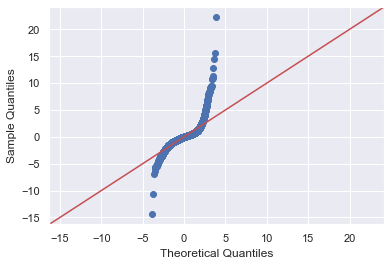

In [163]:
#PLOT A QQ PLOT TO CHECK NORMALITY
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

> **Normality** - Yikes! We have some major issues with normality. This is most likely a result of outliers in the data.

> As a refresher, **scaling** is a form standardizing our data to make sure we have similar magnitudes. **Normalizing** our data refers to using transformation techniques to make data look more like the normal distribution. 

> For instance, "grade" is on a **discrete/categorical** scale of "3-13", while "sqft_living" is made up of **continuous numerical** values in the thousands. This presents a problem if we're going to try and make an accurate and well-fitting model.

> **Check for Heteroscedasticity**

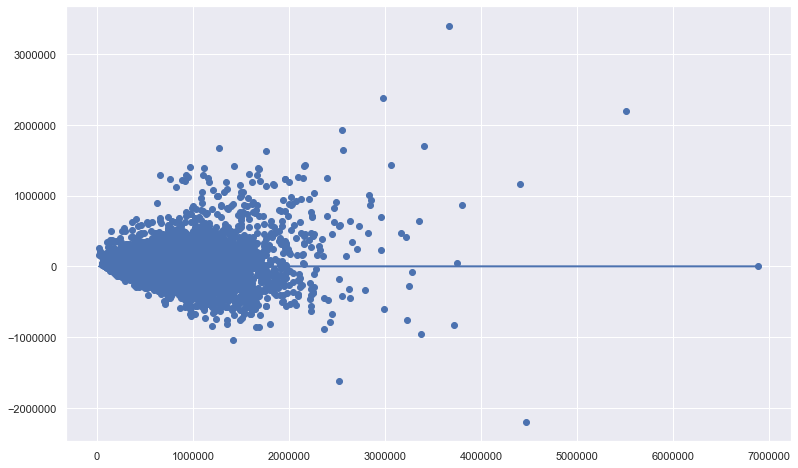

In [112]:
#CHECK FOR HOMOSCEDASTICITY 
plt.subplots(figsize=(13,8))
plt.scatter(model.predict(df_base[features]), model.resid)
plt.plot(model.predict(df_base[features]), [0 for i in range(len(df_base))]);

> - **Yikes again!** We clearly have a heteroscedasticity problem with our data that we'll have to deal with in subsequent models.


> **Conclusions from our base model:**

> **Model fit & R2:** .829 for an R2 value indicates our model fits relatively well. About 83% of the the variance in our data can be explained by the model. 

> **Normality/Residuals check:**
- Very positively skewed with a value of **2.471**
- Kurtosis value of **39.360**, which is well above acceptable value of **3**
- VIF analysis indicates numerous issues with multicollinearity 
- QQ plot indicates the model is not robust, and we need to remove some outliers and normalize (re-scale) some data
- Heteroscedasticity looks to be a problem as well. 
> 
> **Prediction assessment:** 
> - **Actual vs. Predicted** information indicates decent prediction performance from our baseline model


> **NEXT STEPS**:  Now that we've looked at the problems in our raw data, the next steps are to do some feature engineering to normalize the data to prepare it better for multivariate linear regression modeling. 

## FINAL MODEL

> **For the final model, we are going to log transform the following features, in order to scale to increase our model performance:**
>    - sqft_living
>    - bedrooms
>    - bathrooms
>    - sqft_lot
>    - floors
>    - condition
>    - grade
>    - sqft_living15
>    - sqft_lot15
>    - price (independent variable)

> **In this case, we are going to use a logarithm with a base of 10 vs. 2 because we our data vary greatly in magnitude. We need to get them as close to each other as possible to use effectively in our model.**  

In [173]:
# REMOVE OUTLIERS USING Z-SCORE

from scipy import stats

df_base[(np.abs(stats.zscore(df_base[features])) < 3).all(axis=1)]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [180]:
# LOG TRANSFORM DATA THAT DOESN'T HAVE "0" OR NEGATIVE VALUES. WE'LL ALSO REMOVE SOME OF THE FEATURES WITH 
# MULTI-COLLINEARITY PROBLEMS LIKE sqft_above

# Change this into a for loop and function

data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(df_base['sqft_living'])
data_log['logsqft_lot'] = np.log(df_base['sqft_lot'])
data_log['logsqft_living15'] = np.log(df_base['sqft_living15'])
data_log['logsqft_lot15'] = np.log(df_base['sqft_lot15'])

bed_dummies = pd.get_dummies(df_base['bedrooms'], prefix='bed', drop_first=True)
bath_dummies = pd.get_dummies(df_base['bathrooms'], prefix='bath', drop_first=True)
floor_dummies = pd.get_dummies(df_base['floors'], prefix='fl', drop_first=True )
grade_dummies = pd.get_dummies(df_base['grade'], prefix='gd', drop_first=True )
wtf_dummies = pd.get_dummies(df_base['waterfront'], prefix='wtf', drop_first=True)
cond_dummies = pd.get_dummies(df_base['condition'], prefix='cd', drop_first=True)
zip_dummies = pd.get_dummies(df_base['zipcode'], prefix='zip', drop_first=True)

price = df_base['price']

data_2 = pd.concat([price, data_log, bed_dummies, bath_dummies, floor_dummies, grade_dummies, wtf_dummies, 
                 cond_dummies, zip_dummies], axis=1)

y = data_2['price']
X = data_2.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))



16865 4217 16865 4217


In [184]:
# FIT SCIKIT LEARN MODEL
linreg_2 = LinearRegression()
linreg_2.fit(X_train, y_train)

# PREDICT
y_hat_train = linreg_2.predict(X_train)
y_hat_test = linreg_2.predict(X_test)


# LOOK AT RESIDUALS
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Diff between Test/Train RMSE:', abs(train_rmse-test_rmse))
print('R2 train:' , r2_train)
print('R2 test:' , r2_test)


Train Mean Squared Error: 24018885783.331047
Test Mean Squared Error: 1.4796206608127134e+33
Train Root Mean Squared Error: 154980.2754653993
Test Root Mean Squared Error: 3.8465837581062936e+16
Diff between Test/Train RMSE: 3.846583758090795e+16
R2 train: 0.8214966631816967
R2 test: -1.102729955271308e+22


In [186]:
# TURN COEFFICIENTS INTO A DATAFRAME FOR VIEWING
coefs_2 = linreg_2.coef_
view_cfs_2 = pd.DataFrame(coefs_2, X.columns, 
                          columns=['coefficients']).sort_values(by='coefficients', ascending = False)

display(view_cfs_2)


,coefficients
bed_33,2.487401e+18
bath_7.5,2.289024e+17
bath_7.75,2.946738e+06
bath_8.0,2.361576e+06
gd_13,1.900294e+06
...,...
gd_5,-2.058446e+05
bed_7,-2.242000e+05
gd_6,-2.281847e+05
gd_7,-2.285308e+05


In [194]:
pred_df_base = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test, 'Diff': abs(y_test-y_hat_test)}).round(2)

df2 = pred_df_base.sort_values(by=['Diff'], ascending=False).head(20)

df3 = pred_df_base.head(15)

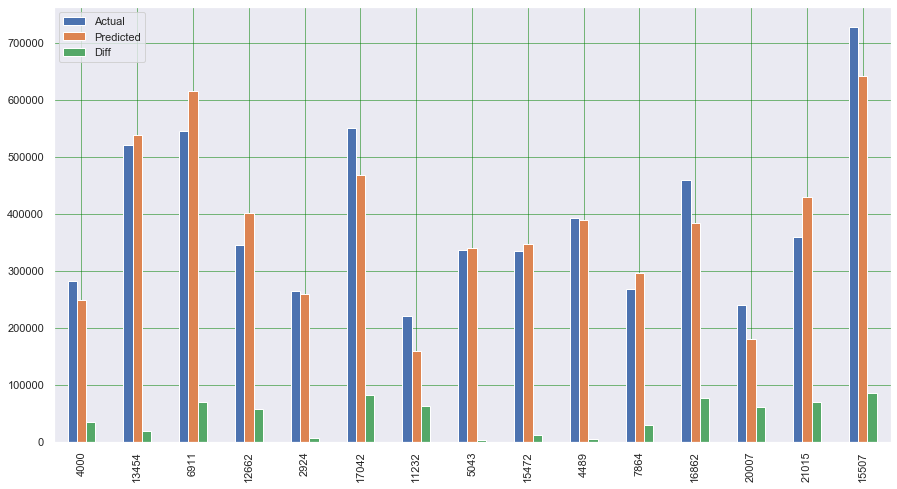

In [195]:
#CODE FROM: 
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df3.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# iNTERPRET


> **Model fit & R2:** .82 adjusted R2 value indicates our model fits well, and we're able to explain 82% of the variance using our model.

> 
> **Prediction assessment:** 
> - **Actual vs. Predicted** information indicates **strong** prediction performance compared to the baseline model
> 


# CONCLUSIONS & RECOMMENDATIONS

> **Conclusion:** The features that had the most significant positive correlation with home sale price were **Grade, Overall Square-Footage, and Condition.** Indeed, our model relieved most heavily on these features to predict home sale prices.

> **Recommendations:**

> **Buyer:** Downplay the importance of the above features (especially grade) during negotiations with the seller. Through your real estate agent, indicate to the seller that you are looking at other homes in the area that better fit your needs (i.e. more bedrooms, bathrooms).      

> **Seller:** Looks at ways to increase the overall grade for your house. Obtain the grading criteria used to generate the data and pick tangible, low-effort/cost areas where you can make improvements to your home that increase your score. Make improvements to justify a larger asking price. Look for a quick way to increase the overall square footage of your house such as a screened in porch or garage addition.




> - **Future Seller-** look at options to add square footage to your house, and remodeling key rooms such as the kitchen to increase your grade.



> **Future research:**
> - Research school zoning data and home distance from elementary, middle, and high schools.

> - Pull new home sale data from after the start of the COVID-19 pandemic, specifically looking at home sale trends in urban vs. rural areas. 

> - Examine crime statistics effect on home prices.

 



## CUT LINE FOR NOTEBOOK

In [ ]:
#CALCULATE ERROR FOR LOG TRANSFORMED DATA

# y_predict_2 = linreg_2.predict(X_test_2)

# linreg_2_mse = mean_squared_error(y_predict_2, y_test_2)


# print('Mean Absolute Percentage Error:', metrics.mean_absolute_error(y_test_2, y_predict_2))  
# print('Mean Squared Percentage Error:', metrics.mean_squared_error(y_test_2, y_predict_2))  
# print('Root Mean Squared Percentage Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_predict_2)))

> The **Root Mean Squared Percentage Error** above indicates that the squared root of the average **percentage** of the difference between our model's prediction and the log transformed observations in our test data is 34%.

In [ ]:
#DUMMY VARIABLES FOR CONDITION, AND GRADE

dummy_condition = pd.get_dummies(df['condition'], prefix= 'cond')
dummy_grade = pd.get_dummies(df['grade'], prefix= 'grade')

display(dummy_condition.head())
display(dummy_grade.head())

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.